Predicting Fetal Health: A Comprehensive Classification Study

In the realm of fetal health classification, we embark on a vital mission to predict the well-being of unborn infants, and this task carries immense weight, touching the lives of expectant mothers and the most vulnerable among us. Our journey begins with a meticulous analysis of a comprehensive fetal health classification dataset—a treasure trove of 2126 records of features extracted from Cardiotocogram exams. These records were carefully classified into three classes: "Normal," "Suspect," and "Pathological" by three expert obstetricians, whose expertise and insights are invaluable in shaping our understanding of fetal health.

Much like a symphony of strategies in a grand performance, we wield a trio of classifiers: linear regression, random forest, and decision tree. Each classifier possesses its unique strengths and methods, akin to the diverse tactics employed by teams on the field. With precision honed through rigorous training, these algorithms adapt to unveil critical insights, distinguishing between potential fetal health concerns and positive outcomes.

Yet, fetal health classification extends beyond individual performance. It demands a deep understanding of the intricate interplay between health indicators, much like deciphering the tactics of rival teams. We delve into the dataset's depths, unveiling hidden patterns and identifying variables that signify fetal well-being or distress. This analytical journey mirrors the art of studying opponents' strategies to gain an edge.

While the applause may be silent in the laboratory, the significance of our work cannot be overstated. These classifiers empower healthcare professionals to make informed decisions, ensuring the well-being of both unborn children and expectant mothers. In this realm, your role is indispensable, much like an unsung hero, translating data into actionable insights that shape the course of future generations' health—a testament to the power of data and innovation in the world of healthcare.


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df=pd.read_csv("fetal_health.csv")
# Read in dataset
# ...WRITE YOUR CODE FOR TASK 1 ...
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [2]:
duplicates=df.duplicated().sum()
duplicates

13

In [4]:
df.drop_duplicates(inplace=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

In [7]:
count=df.value_counts('fetal_health')
print(count)

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64


In [15]:
cout=df.value_counts('light_decelerations')
print(cout)

light_decelerations
0.000    1218
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: count, dtype: int64


In [8]:
missing_values = df.isna().sum()

print("Number of missing values per column:", missing_values)

Number of missing values per column: baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
his

<Figure size 1000x600 with 0 Axes>

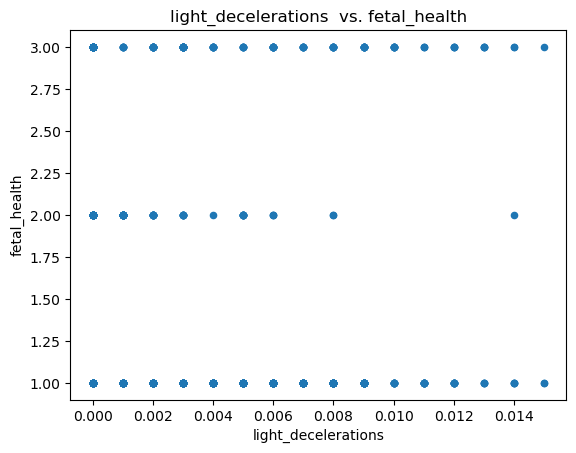

In [18]:
# light_decelerations  vs. fetal_health
#plt.figure(figsize=(10, 6))
df.plot.scatter(x="light_decelerations", y="fetal_health")
plt.title('light_decelerations  vs. fetal_health')
plt.xlabel('light_decelerations')
plt.ylabel("fetal_health")
plt.show()

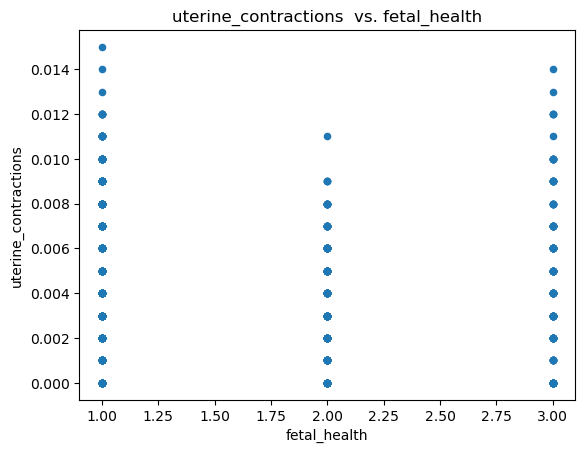

In [24]:
# uterine_contractions  vs. fetal_health
#plt.figure(figsize=(10, 20))
df.plot.scatter(x="fetal_health", y="uterine_contractions")
plt.title('uterine_contractions  vs. fetal_health')
plt.xlabel('fetal_health')
plt.ylabel("uterine_contractions")
plt.show()

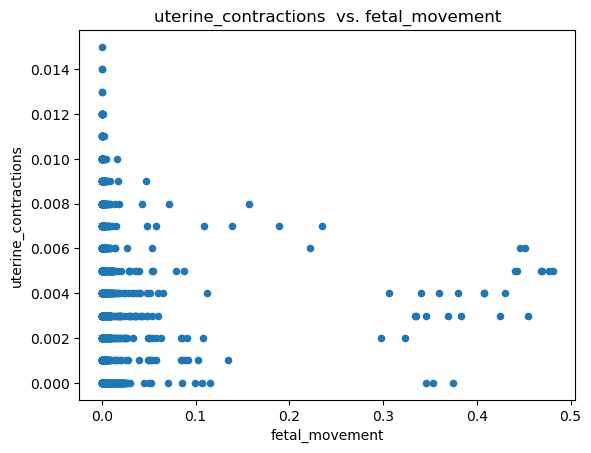

In [25]:
df.plot.scatter(x="fetal_movement", y="uterine_contractions")
plt.title('uterine_contractions  vs. fetal_movement')
plt.xlabel('fetal_movement')
plt.ylabel("uterine_contractions")
plt.show()

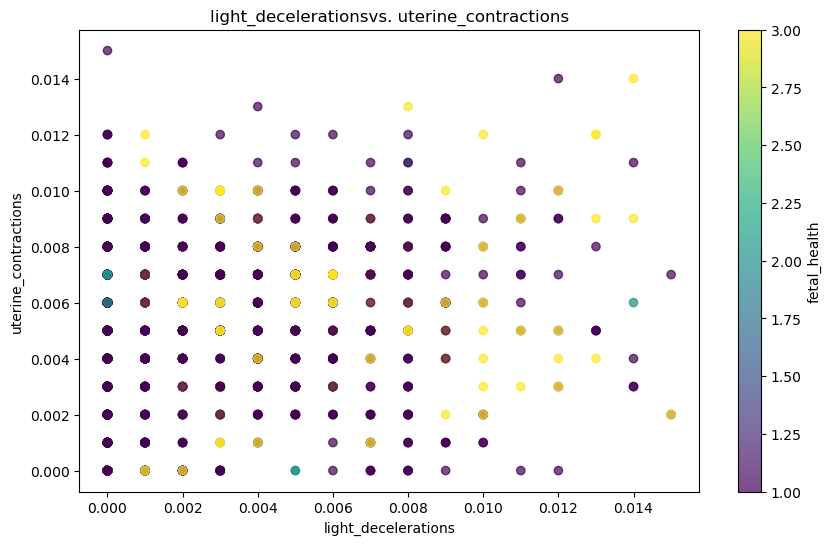

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(x="light_decelerations", y="uterine_contractions",data=df, c = 'fetal_health', cmap='viridis', alpha=0.7)   
plt.xlabel('light_decelerations')
plt.ylabel('uterine_contractions')
plt.title('light_decelerationsvs. uterine_contractions')
plt.colorbar(label='fetal_health')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
df2 = df.copy()
df2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


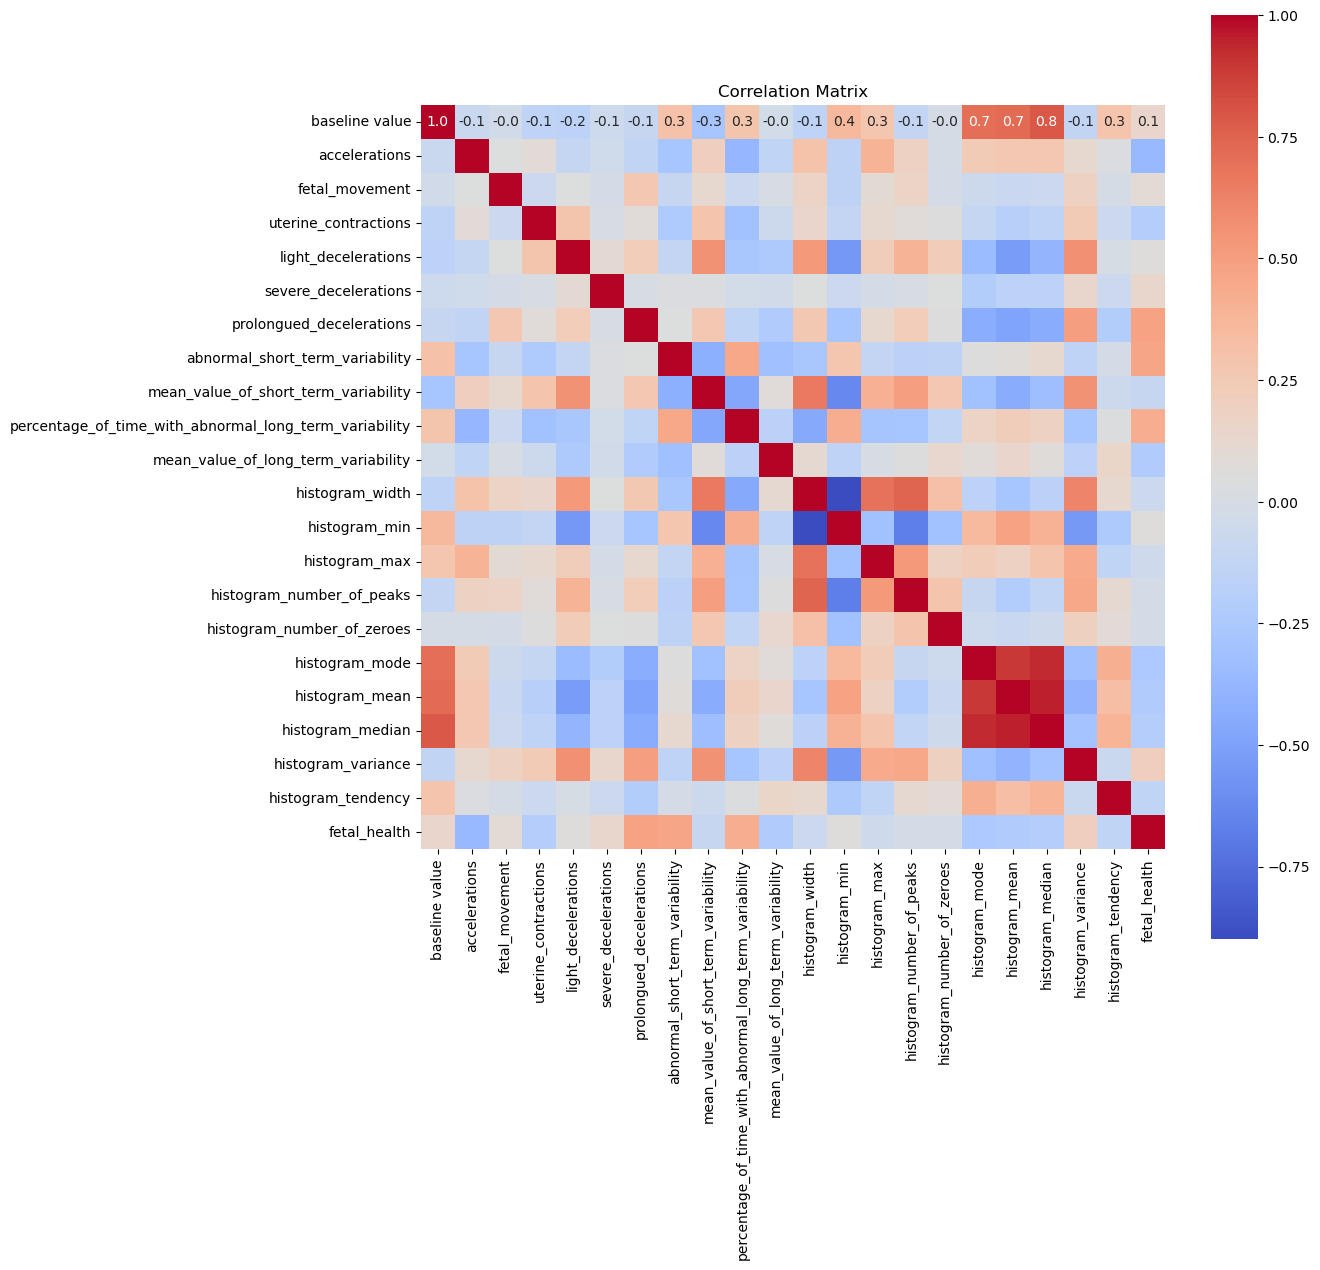

In [32]:
num_cols = df2.select_dtypes(include=['float64']).columns.tolist()

plt.figure(figsize=(12, 12))
correlation_matrix = df[num_cols].corr()    # use corr() for getting the correlation matrix

sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True)    # try annot=False and see what difference it makes
plt.title('Correlation Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    'age': [25, 32, 47, 51],
    'income': [50000, 60000, 120000, 80000],
    'gender': ['male', 'female', 'female', 'male'],
    'purchased': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Splitting features and target
X = df.drop('purchased', axis=1)
y = df['purchased']

# Define numerical and categorical columns
numerical_features = ['age', 'income']
categorical_features = ['gender']

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

# Convert to DataFrame for better readability
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

print(X_transformed_df)

In [33]:
X = df2.drop('fetal_health', axis=1)
y = df2['fetal_health']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)      # fill the parameters carefully

# TODO: Make predictions
y_pred = lr_model.predict(X_test_scaled)    # fill the parameters carefully
y_pred

array([2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 2., 3., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 3., 1., 2., 2., 1., 2., 3., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 3., 3.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       3., 2., 1., 1., 1.

In [43]:
print("Accuracy:")
accuracy_score(y_test, y_pred) 

Accuracy:


0.9132492113564669

In [44]:
print("Confusion Matrix:")
c=confusion_matrix(y_test, y_pred)
print(c)

Confusion Matrix:
[[483  11   3]
 [ 26  58   6]
 [  3   6  38]]


In [46]:
print("Classification Report:")
cls_report=classification_report(y_test, y_pred)
print(cls_report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       497
         2.0       0.77      0.64      0.70        90
         3.0       0.81      0.81      0.81        47

    accuracy                           0.91       634
   macro avg       0.84      0.81      0.82       634
weighted avg       0.91      0.91      0.91       634



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score



In [57]:
rf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4, random_state=33)

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=33)

In [60]:
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

Accuracy: 0.9211356466876972


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}

# Create a RandomizedSearchCV object
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 186}


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=33)

In [64]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=33)

In [67]:
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

Accuracy: 0.9037854889589906
